In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
rouge_results_df = pd.read_csv('rouge_scores.csv')
rouge_corr_df = pd.read_csv('rouge_scores_corr.csv')

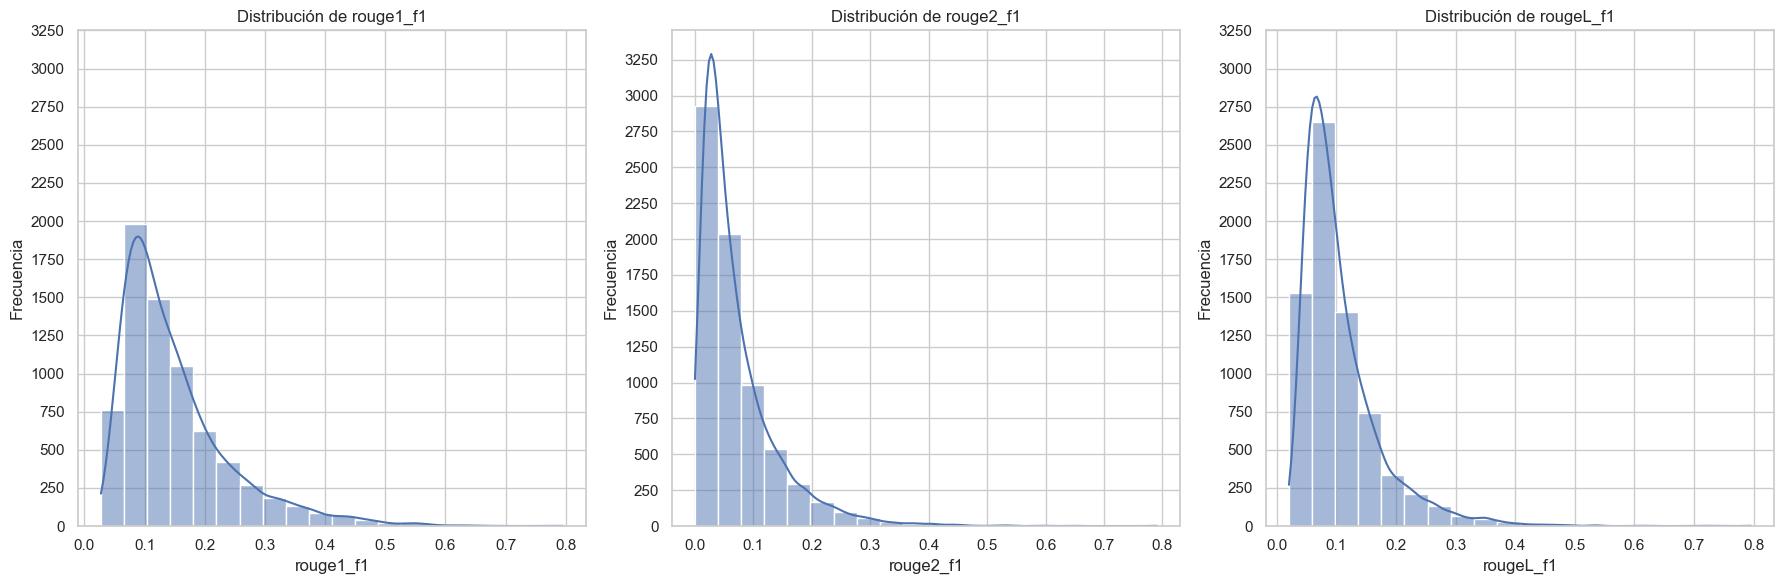

In [18]:
sns.set(style="whitegrid")

# 1. Histograms for the distributions of rouge1_f1, rouge2_f1, and rougeL_f1
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics = ['rouge1_f1', 'rouge2_f1', 'rougeL_f1']
for i, metric in enumerate(metrics):
    sns.histplot(rouge_results_df[metric], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {metric}')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_yticks(range(0, 3500, 250))
plt.tight_layout()
plt.show()

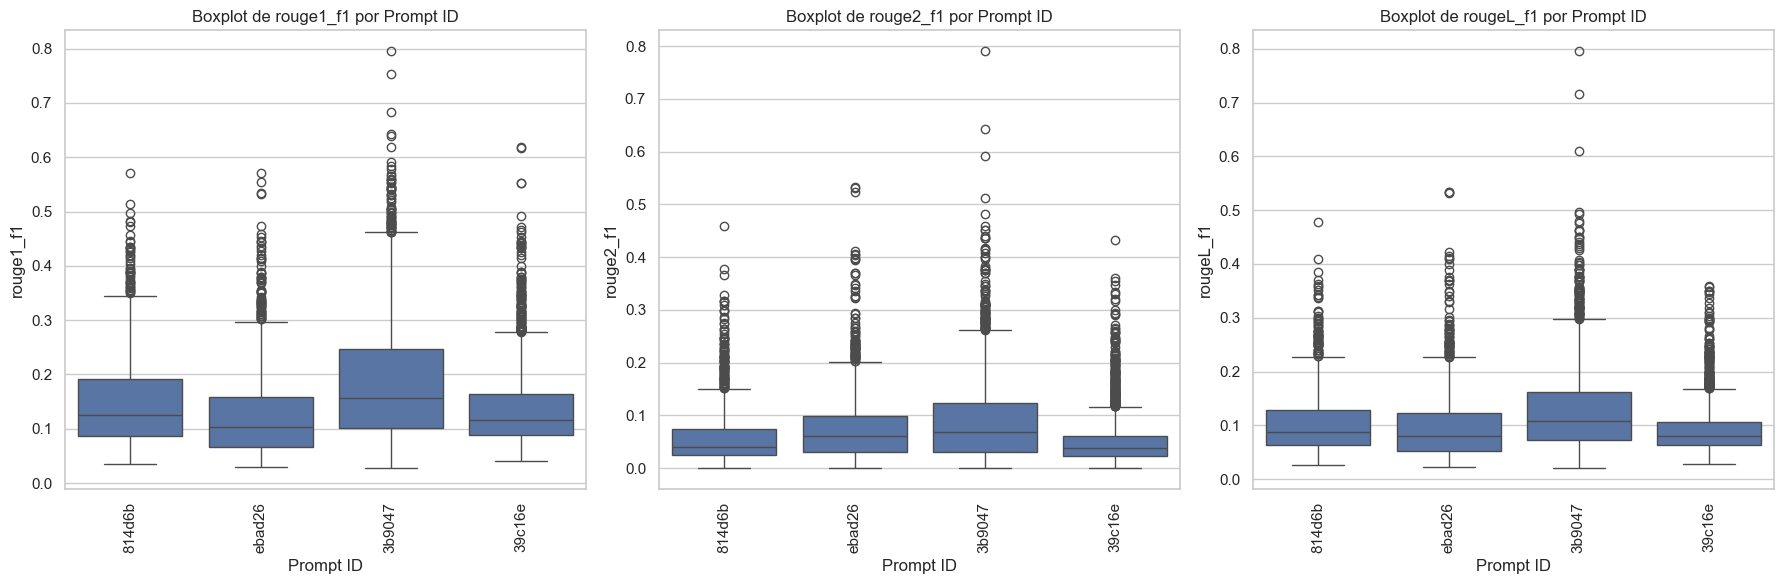

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics = ['rouge1_f1', 'rouge2_f1', 'rougeL_f1']
for i, metric in enumerate(metrics):
    sns.boxplot(data=rouge_results_df, x='prompt_id', y=metric, ax=axes[i])
    axes[i].set_title(f'Boxplot de {metric} por Prompt ID')
    axes[i].set_xlabel('Prompt ID')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

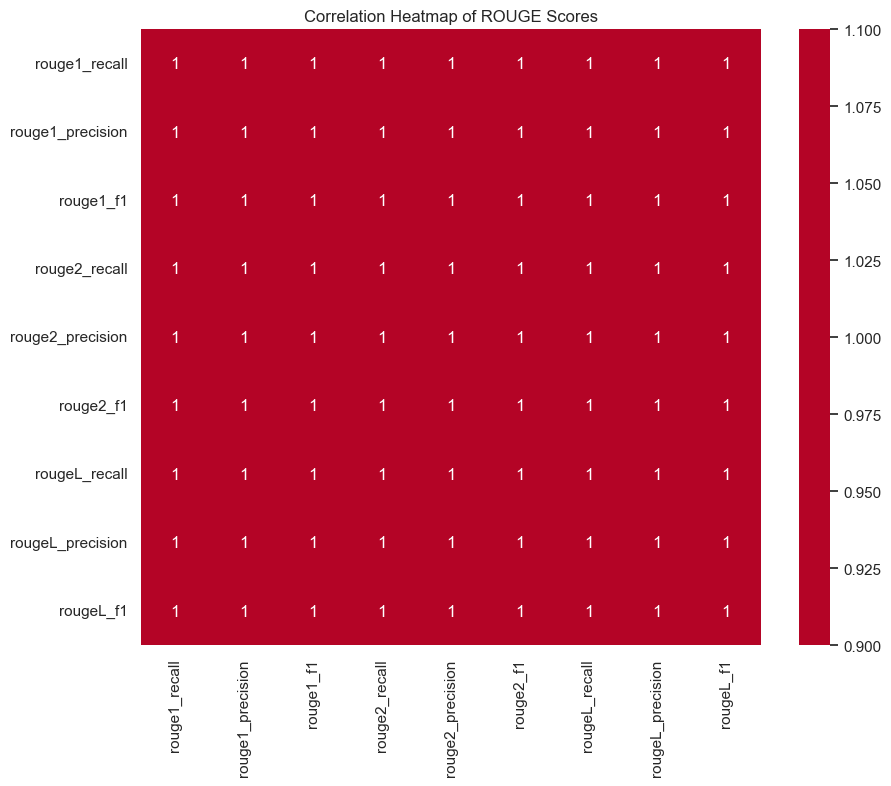

In [21]:
# Filtrar solo las columnas numéricas
correlation_matrix = rouge_corr_df.select_dtypes(include=['float64', 'int']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of ROUGE Scores')
plt.show()